# Healthcare Portfolio Risk and Returns

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
# Healthcare Stock
symbols = ['UNH','ISRG','TAK','BSX','ALXN','IDXX','ZTS','LHCG','EHC','ENSG','GWPH','ABMD','VHT','JNJ','MRK','RYH','GH','EW','INMD','BRKR','INCY','VRTX']
start = '2016-01-01'
end = '2019-01-01'

In [3]:
df = yf.download(symbols,start,end)['Adj Close']

[*********************100%***********************]  22 of 22 downloaded


In [4]:
#df = pd.DataFrame()
#for s in symbols:
#    df[s] = yf.download(s,start,end)['Adj Close']

In [5]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
3 years


In [6]:
number_of_years = delta.years

In [7]:
days = (df.index[-1] - df.index[0]).days
days

1092

In [8]:
df.head()

ABMD        ALXN       BRKR        BSX        EHC       ENSG  \
2016-01-04  85.239998  184.679993  23.170813  17.990000  32.182846  19.809750   
2016-01-05  85.000000  184.899994  23.503780  18.180000  32.257118  19.846268   
2016-01-06  85.300003  184.070007  23.180599  18.000000  32.461334  19.864527   
2016-01-07  81.919998  174.369995  22.162104  17.639999  31.523788  19.280275   
2016-01-08  84.580002  168.130005  22.044584  17.430000  32.368504  19.115953   

                   EW  GH       GWPH       IDXX  ...        ISRG        JNJ  \
2016-01-04  78.839996 NaN  68.459999  71.120003  ...  182.463333  90.186127   
2016-01-05  80.010002 NaN  68.370003  71.830002  ...  183.986664  90.563103   
2016-01-06  80.440002 NaN  63.860001  71.320000  ...  184.413330  90.105339   
2016-01-07  77.559998 NaN  61.810001  69.809998  ...  178.966660  89.055214   
2016-01-08  76.040001 NaN  59.860001  69.099998  ...  178.846664  88.103813   

                 LHCG        MRK         RYH        TAK         UNH  \
2016-01-04  42.970001  46.589718  147.931290  21.372053  109.414070   
2016-01-05  42.560001  47.184521  148.697845  21.389389  109.620773   
2016-01-06  44.099998  46.536442  147.174576  21.276718  108.502785   
2016-01-07  43.500000  46.128082  143.892258  21.406723  105.308441   
2016-01-08  42.240002  45.346848  141.740051  20.938719  103.495232   

                   VHT        VRTX        ZTS  
2016-01-04  122.920502  122.889999  45.972393  
2016-01-05  123.486664  123.449997  46.692066  
2016-01-06  122.222260  122.230003  46.701801  
2016-01-07  119.523621  114.959999  45.281872  
2016-01-08  117.787430  110.709999  44.620541  

[5 rows x 21 columns]

In [9]:
df.tail()

ABMD       ALXN       BRKR        BSX        EHC       ENSG  \
2018-12-24  281.079987  93.940002  26.352285  31.730000  58.493076  33.941807   
2018-12-26  307.440002  97.870003  27.627552  33.680000  60.870125  36.158653   
2018-12-27  315.670013  98.099998  28.713528  34.480000  60.467407  35.692928   
2018-12-28  318.170013  97.209999  29.012419  34.669998  60.251305  35.793648   
2018-12-31  325.040009  97.360001  29.660019  35.340000  60.872860  36.176018   

                    EW         GH       GWPH        IDXX  ...        ISRG  \
2018-12-24  139.919998  32.529999  98.050003  176.179993  ...  434.890015   
2018-12-26  147.990005  35.459999  98.279999  185.600006  ...  461.980011   
2018-12-27  150.009995  35.630001  94.360001  187.949997  ...  468.700012   
2018-12-28  150.410004  37.709999  95.400002  185.880005  ...  471.200012   
2018-12-31  153.169998  37.590000  97.389999  186.020004  ...  478.920013   

                   JNJ       LHCG        MRK         RYH        TAK  \
2018-12-24  119.472168  88.790001  69.263184  165.200867  15.936852   
2018-12-26  123.236069  92.639999  72.037590  173.176147  16.530653   
2018-12-27  123.916885  93.529999  73.380989  174.679611  16.233753   
2018-12-28  123.780724  93.750000  73.371269  174.550186  16.032627   
2018-12-31  125.511925  93.879997  74.383682  176.760559  16.109245   

                   UNH         VHT        VRTX        ZTS  
2018-12-24  229.066162  147.163574  151.910004  78.777962  
2018-12-26  239.303040  153.978455  161.839996  82.394913  
2018-12-27  241.879486  155.414185  162.369995  83.795990  
2018-12-28  242.144989  155.620697  161.419998  83.954971  
2018-12-31  244.977097  157.931641  165.710007  84.998329  

[5 rows x 21 columns]

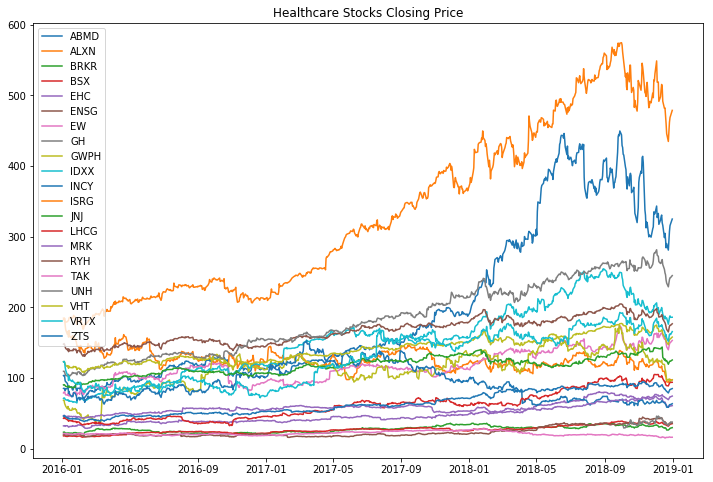

In [10]:
plt.figure(figsize=(12,8))
plt.plot(df)
plt.title('Healthcare Stocks Closing Price')
plt.legend(labels=df.columns)

In [11]:
# Normalize the data
normalize = (df - df.min())/ (df.max() - df.min())

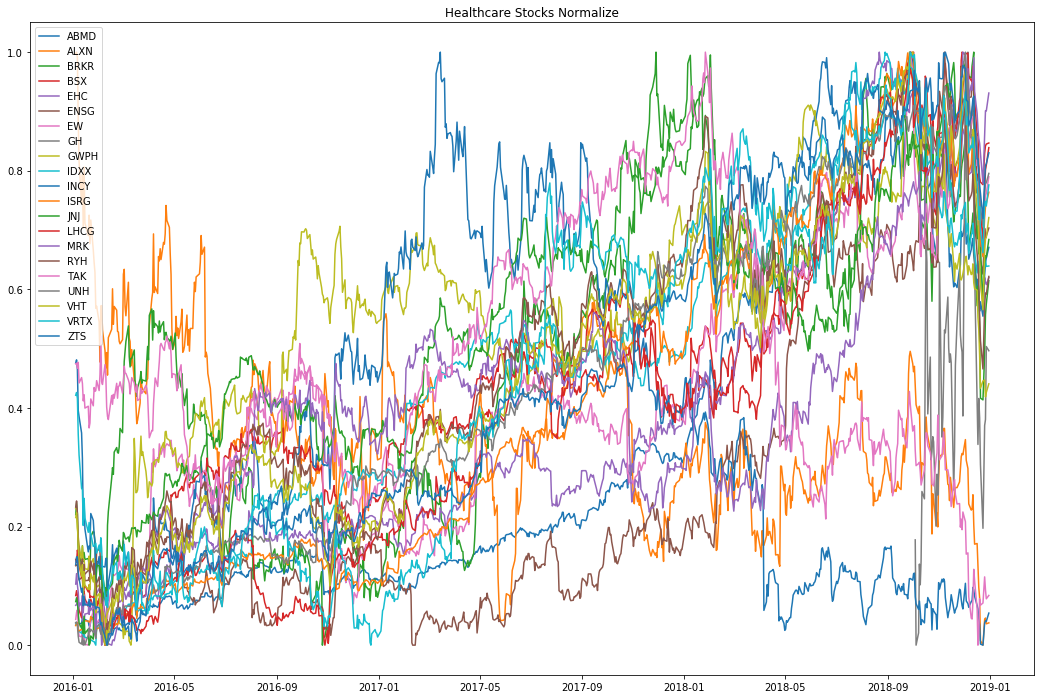

In [12]:
plt.figure(figsize=(18,12))
plt.plot(normalize)
plt.title('Healthcare Stocks Normalize')
plt.legend(labels=normalize.columns)

In [13]:
stock_rets = df.pct_change().dropna()

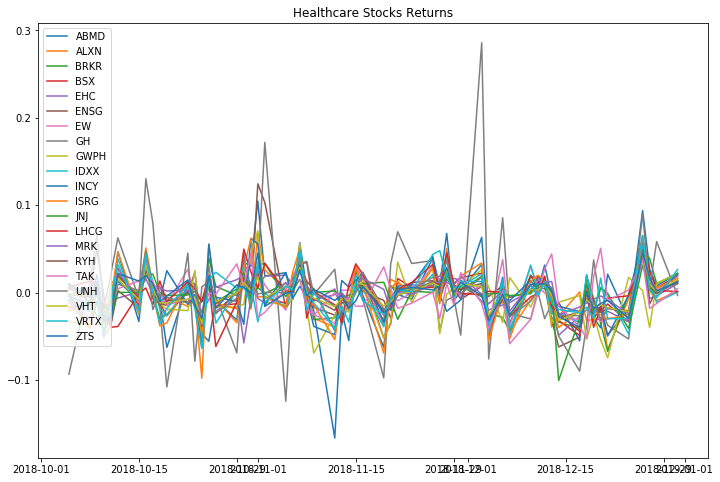

In [14]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets)
plt.title('Healthcare Stocks Returns')
plt.legend(labels=stock_rets.columns)

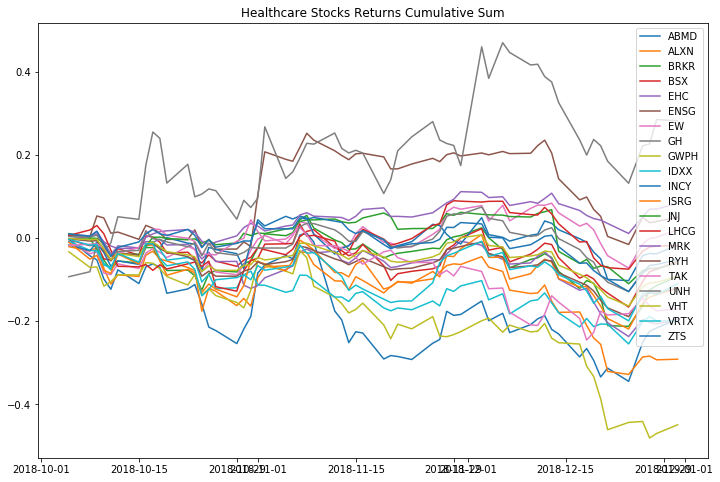

In [15]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets.cumsum())
plt.title('Healthcare Stocks Returns Cumulative Sum')
plt.legend(labels=stock_rets.columns)

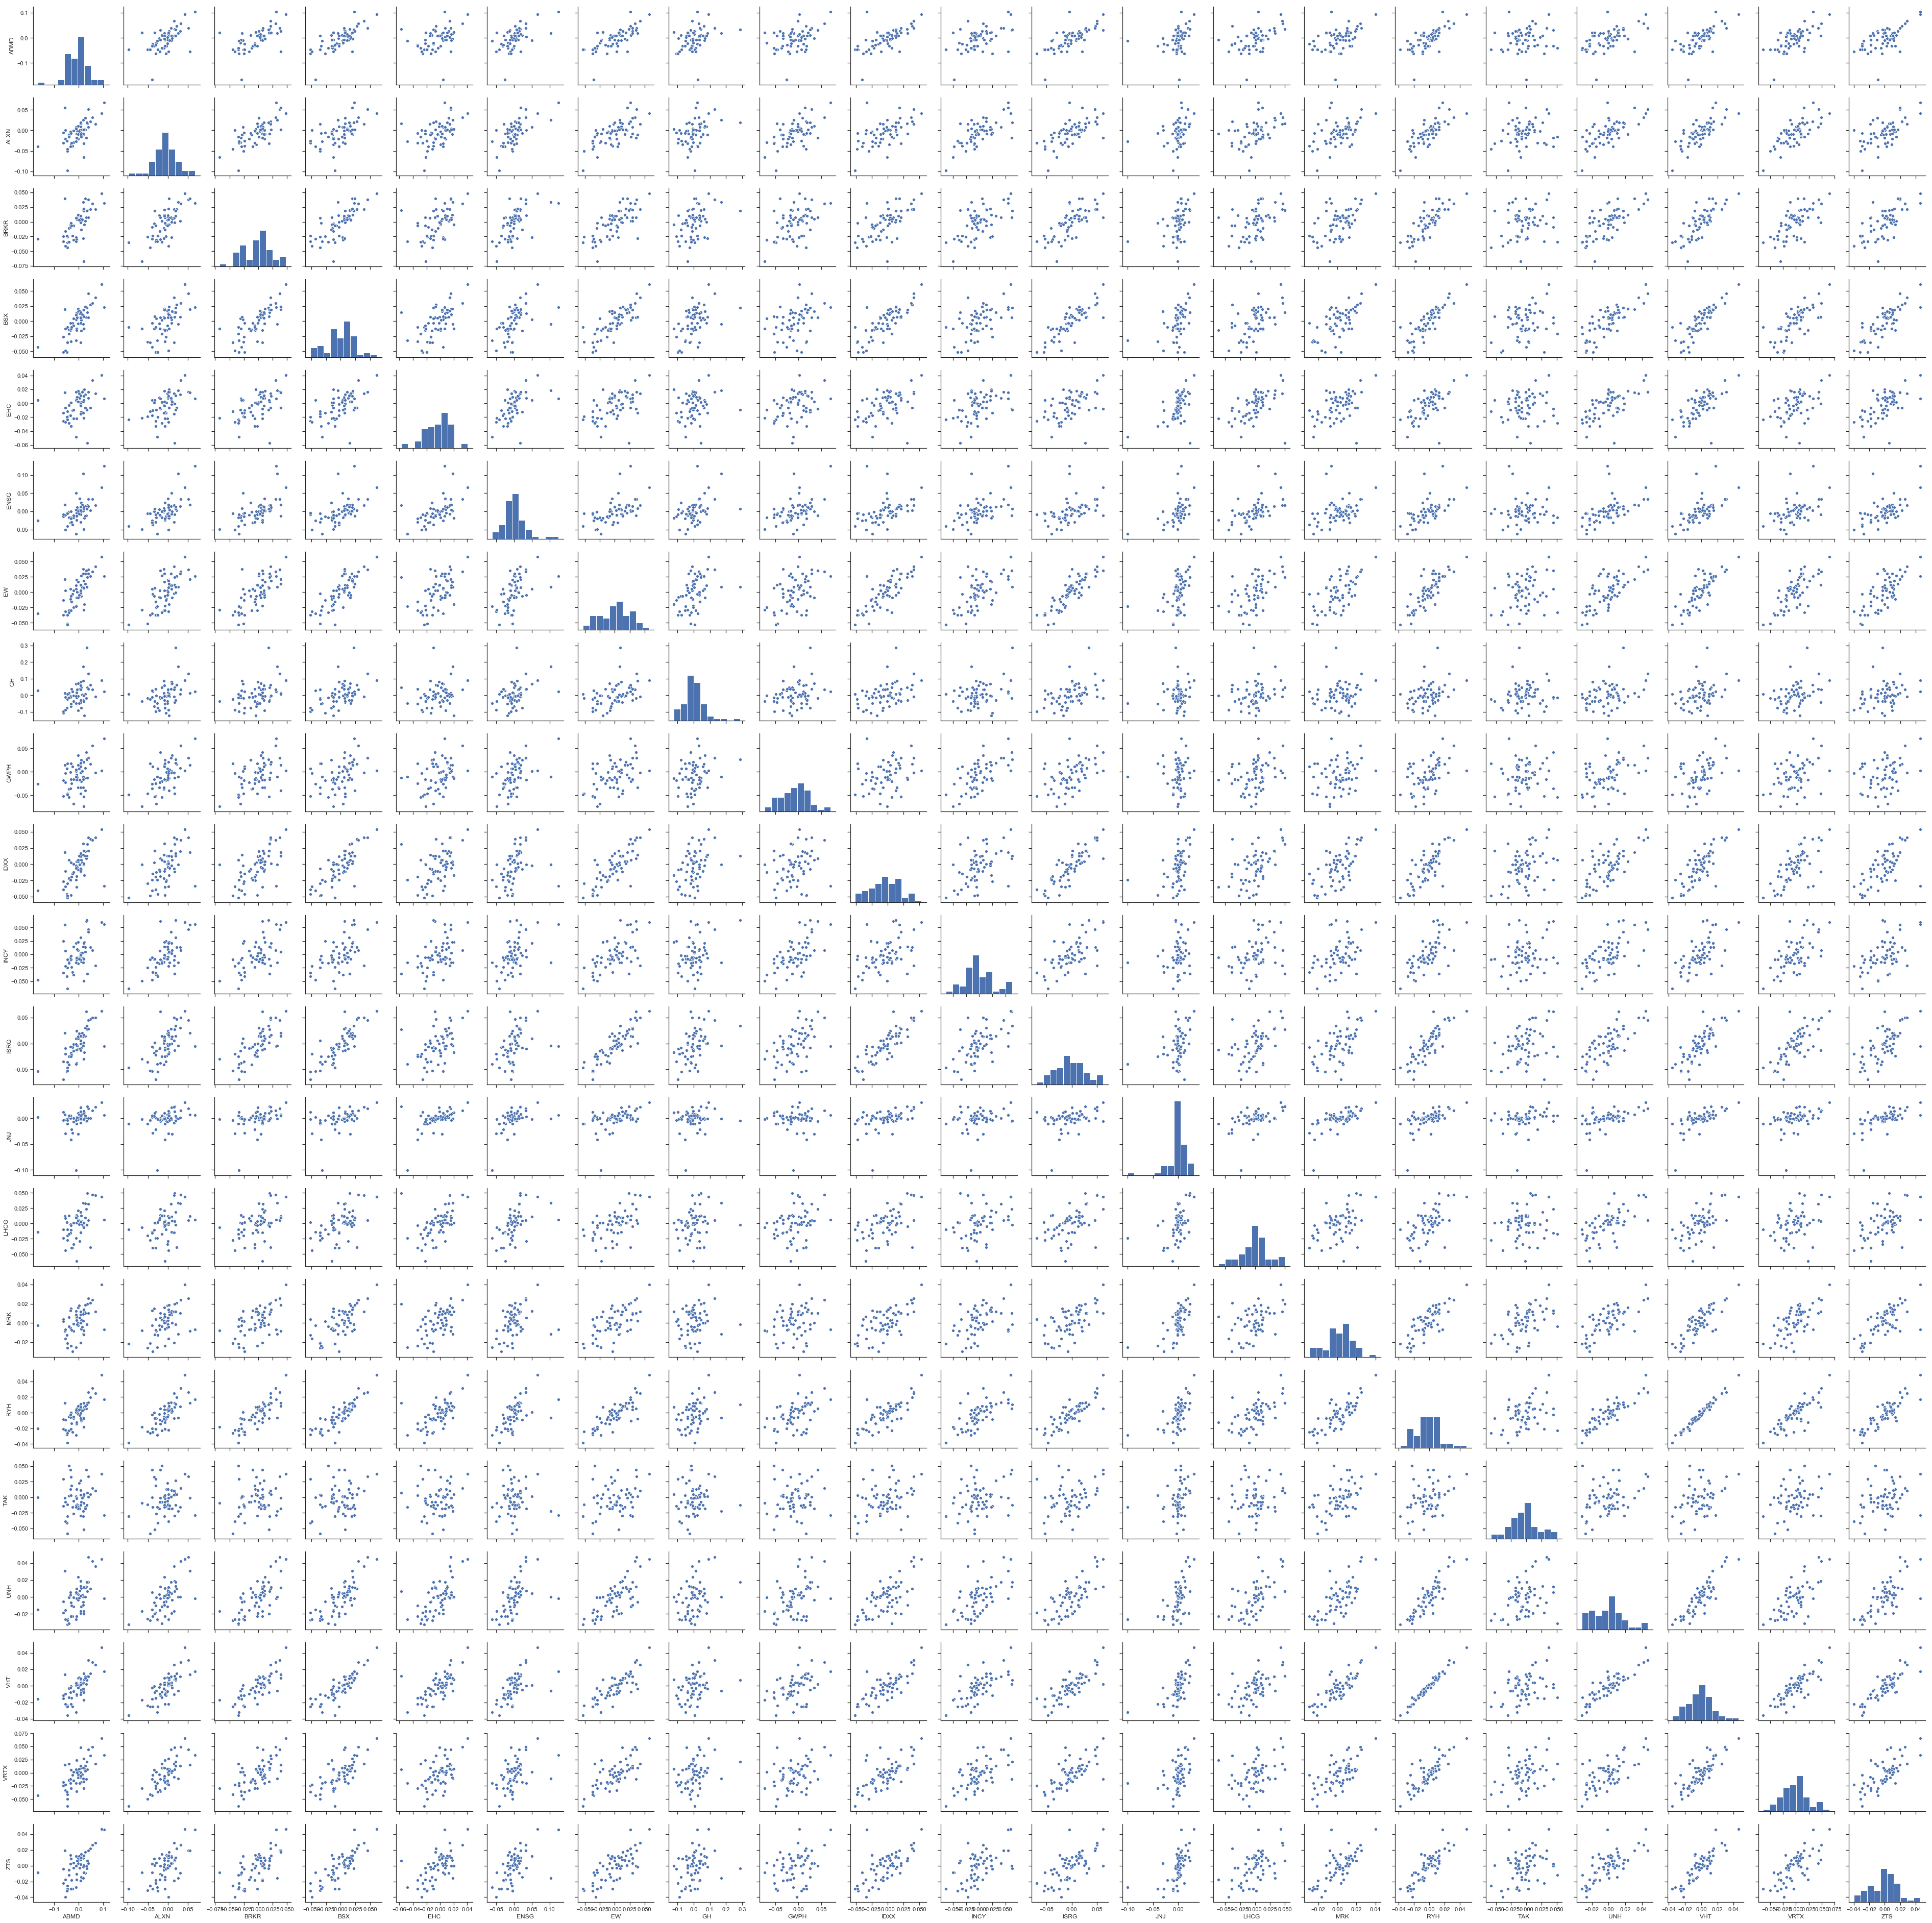

In [16]:
sns.set(style='ticks')
ax = sns.pairplot(stock_rets, diag_kind='hist')

nplot = len(stock_rets.columns)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

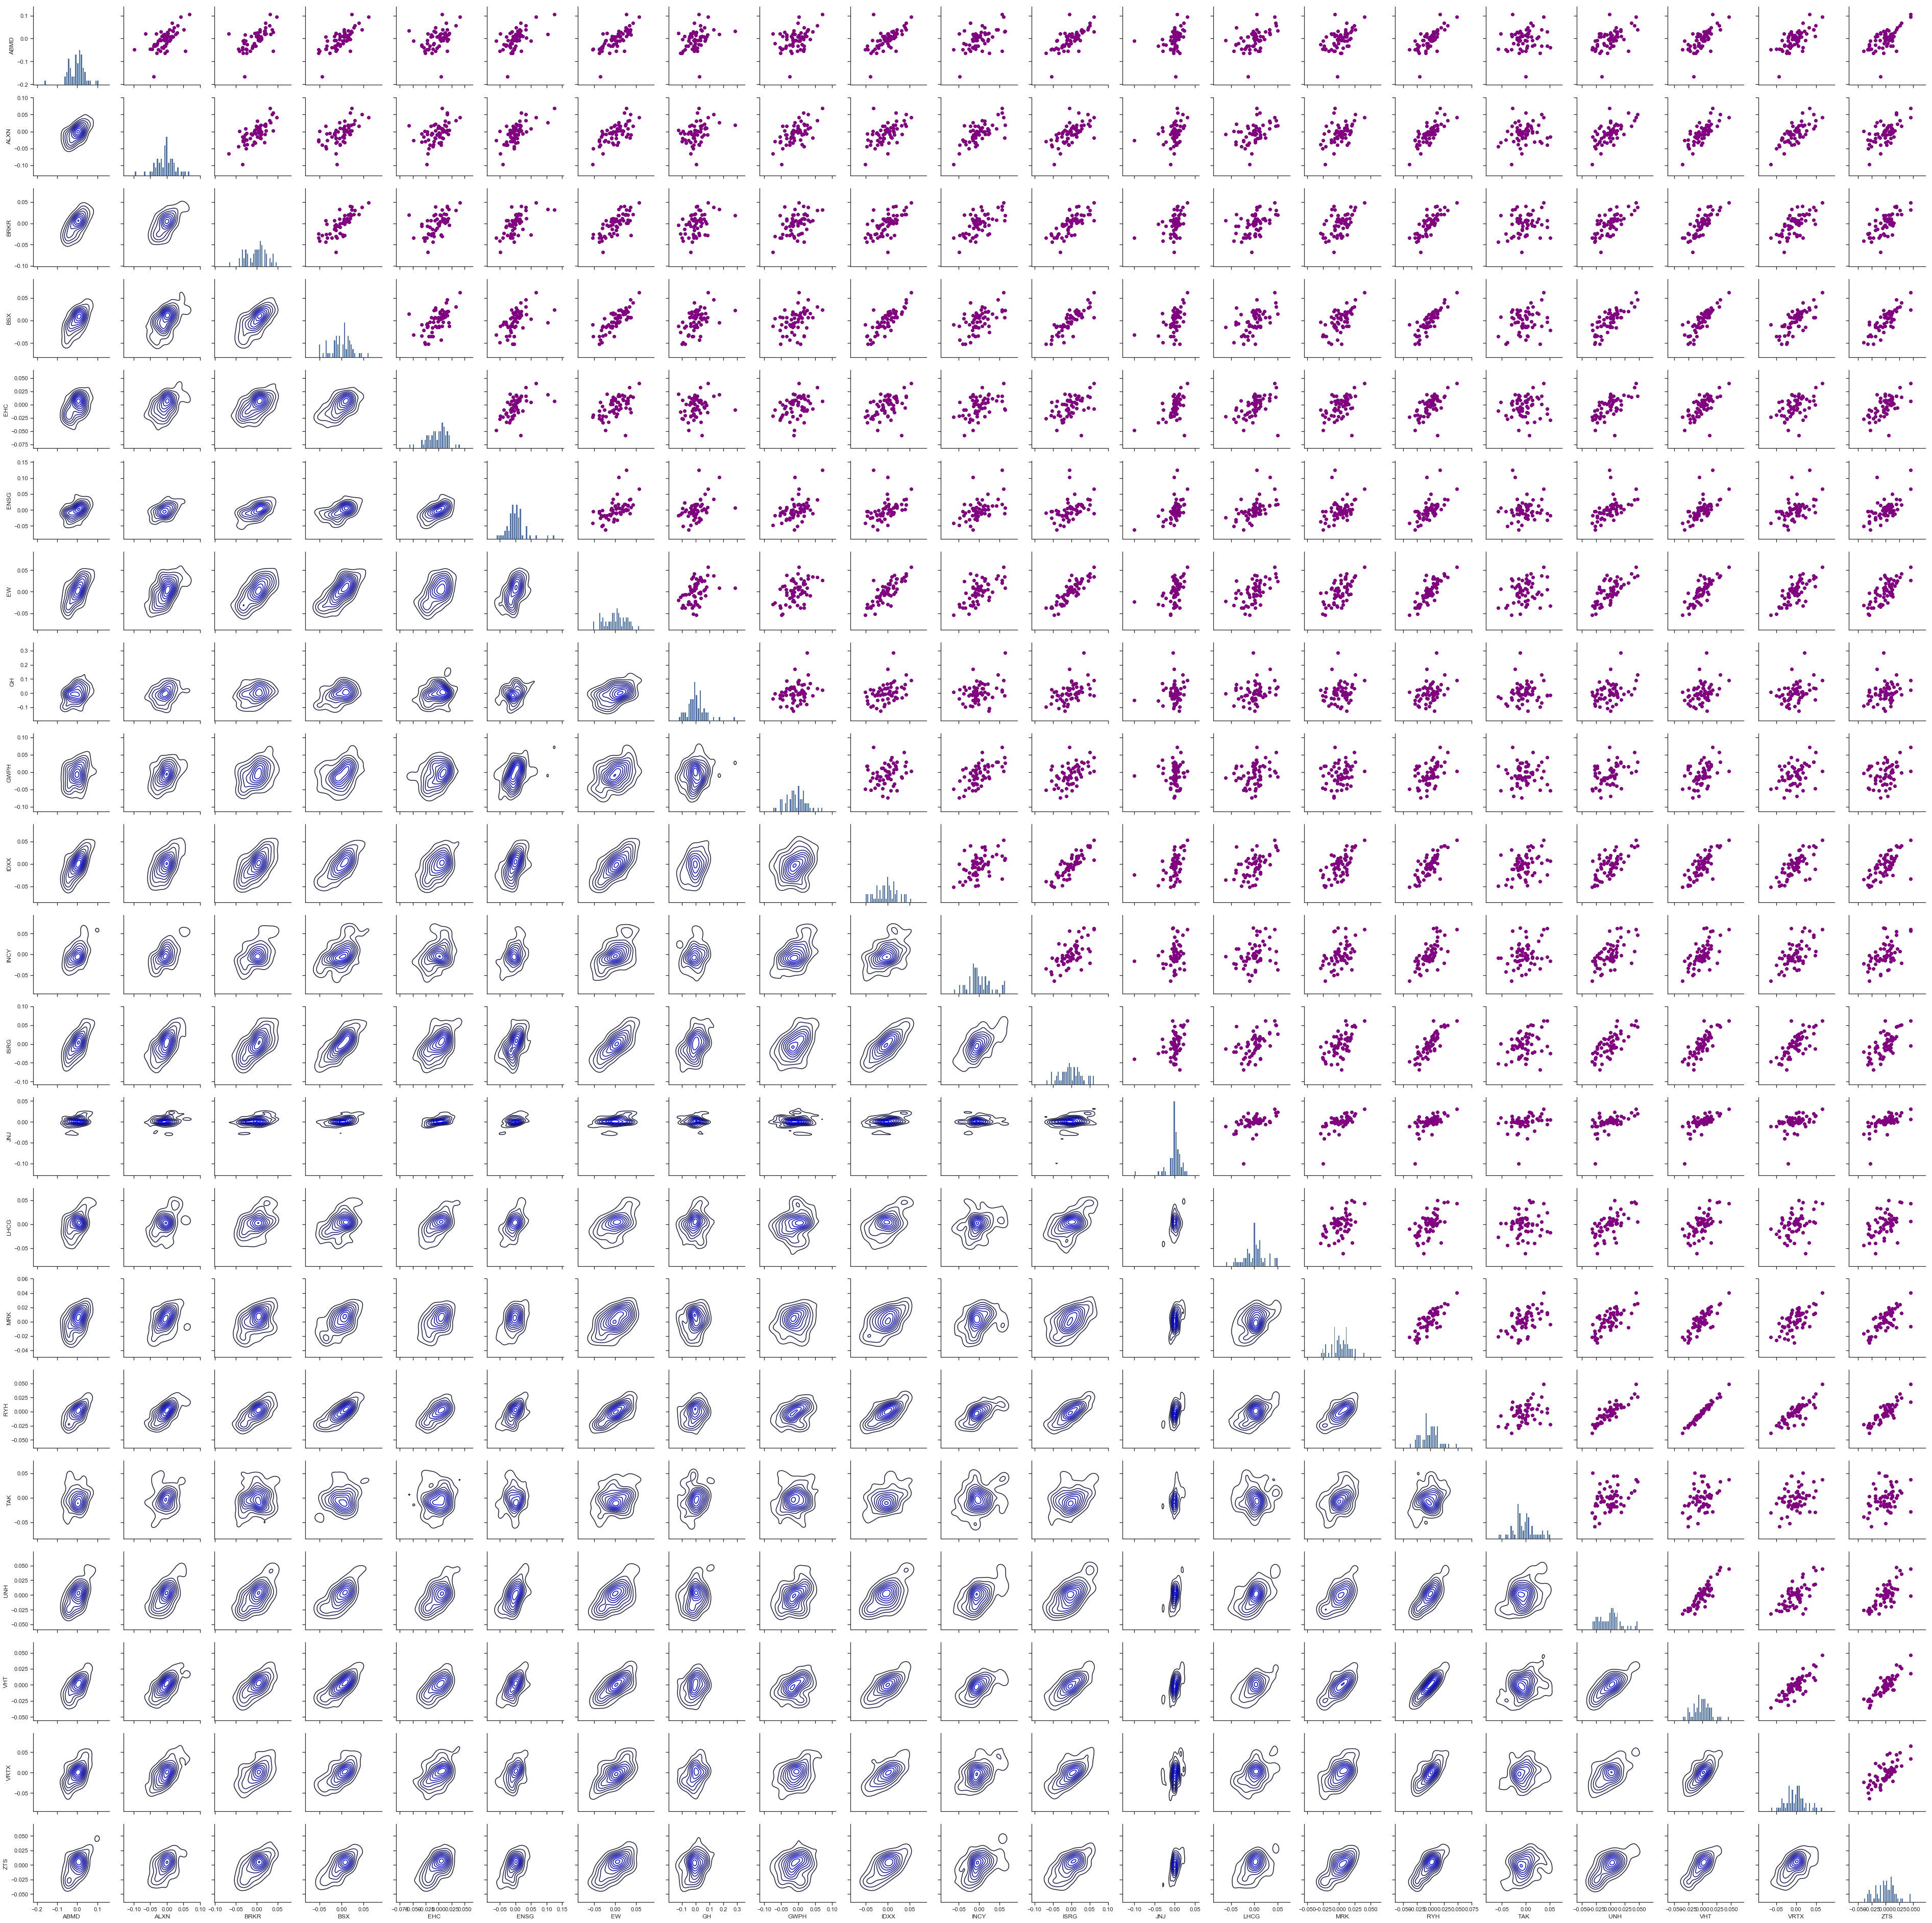

In [17]:
ax = sns.PairGrid(stock_rets)
ax.map_upper(plt.scatter, color='purple')
ax.map_lower(sns.kdeplot, color='blue')
ax.map_diag(plt.hist, bins=30)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

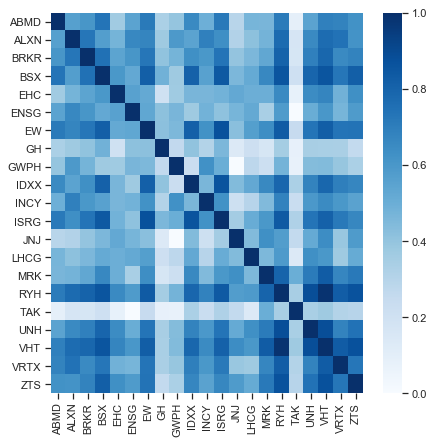

In [18]:
plt.figure(figsize=(7,7))
corr = stock_rets.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            cmap="Blues")

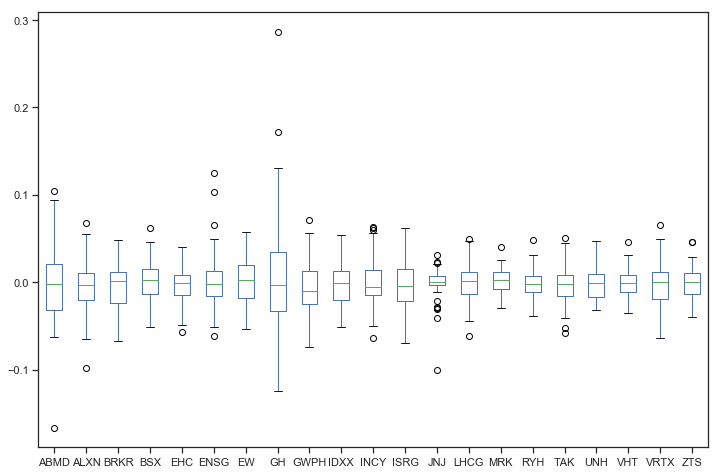

In [19]:
# Box plot
stock_rets.plot(kind='box',figsize=(12,8))

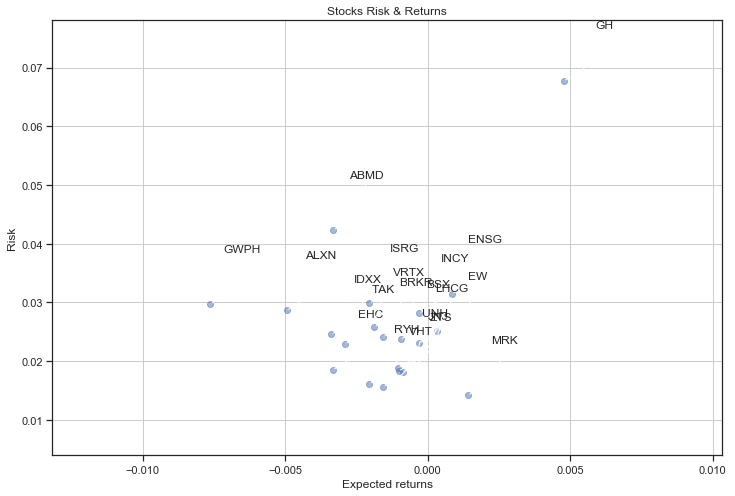

In [20]:
rets = stock_rets.dropna()

plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(),alpha = 0.5)

plt.title('Stocks Risk & Returns')
plt.xlabel('Expected returns')
plt.ylabel('Risk')
plt.grid(which='major')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

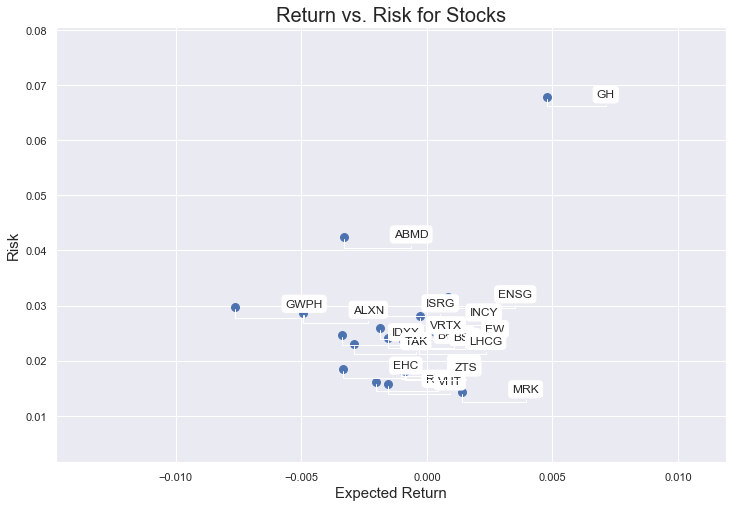

In [21]:
rets = stock_rets.dropna()
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel("Expected Return", fontsize=15)
plt.ylabel("Risk", fontsize=15)
plt.title("Return vs. Risk for Stocks", fontsize=20)

for label, x, y in zip(rets.columns, rets.mean(), rets.std()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

In [22]:
rest_rets = rets.corr()
pair_value = rest_rets.abs().unstack()
pair_value.sort_values(ascending = False)

ZTS   ZTS     1.000000
IDXX  IDXX    1.000000
UNH   UNH     1.000000
TAK   TAK     1.000000
RYH   RYH     1.000000
MRK   MRK     1.000000
LHCG  LHCG    1.000000
JNJ   JNJ     1.000000
ISRG  ISRG    1.000000
GWPH  GWPH    1.000000
VRTX  VRTX    1.000000
GH    GH      1.000000
EW    EW      1.000000
ENSG  ENSG    1.000000
EHC   EHC     1.000000
BSX   BSX     1.000000
BRKR  BRKR    1.000000
ALXN  ALXN    1.000000
VHT   VHT     1.000000
INCY  INCY    1.000000
ABMD  ABMD    1.000000
RYH   VHT     0.986803
VHT   RYH     0.986803
UNH   VHT     0.886695
VHT   UNH     0.886695
RYH   UNH     0.883594
UNH   RYH     0.883594
ZTS   VHT     0.871395
VHT   ZTS     0.871395
EW    ISRG    0.871233
                ...   
LHCG  GH      0.216570
GH    LHCG    0.216570
INCY  JNJ     0.214591
JNJ   INCY    0.214591
BSX   TAK     0.207357
TAK   BSX     0.207357
GH    EHC     0.204516
EHC   GH      0.204516
ALXN  TAK     0.168423
TAK   ALXN    0.168423
MRK   GH      0.168115
GH    MRK     0.168115
BRKR  TAK  

In [23]:
# Normalized Returns Data
Normalized_Value = ((rets[:] - rets[:].min()) /(rets[:].max() - rets[:].min()))
Normalized_Value.head()

ABMD      ALXN      BRKR       BSX       EHC      ENSG  \
2018-10-05  0.603733  0.463182  0.672497  0.421878  0.668474  0.360730   
2018-10-08  0.464994  0.526453  0.486220  0.328326  0.553627  0.321250   
2018-10-09  0.576938  0.641386  0.349817  0.482838  0.633434  0.599947   
2018-10-10  0.443327  0.284660  0.356814  0.149604  0.391961  0.305672   
2018-10-11  0.521713  0.361427  0.378280  0.429843  0.484154  0.137092   

                  EW        GH      GWPH      IDXX  ...      ISRG       JNJ  \
2018-10-05  0.408502  0.075604  0.282738  0.411918  ...  0.447568  0.747515   
2018-10-08  0.212295  0.332131  0.255350  0.282935  ...  0.217876  0.776927   
2018-10-09  0.529680  0.464701  0.518465  0.472605  ...  0.594664  0.750782   
2018-10-10  0.014023  0.257212  0.193928  0.203776  ...  0.254114  0.681045   
2018-10-11  0.450634  0.356541  0.586831  0.352875  ...  0.466926  0.546963   

                LHCG       MRK       RYH       TAK       UNH       VHT  \
2018-10-05  0.607667  0.385977  0.417552  0.371507  0.446368  0.417203   
2018-10-08  0.669859  0.511321  0.381987  0.557275  0.396287  0.402060   
2018-10-09  0.648366  0.601302  0.451919  0.548035  0.456536  0.445388   
2018-10-10  0.372533  0.048830  0.164255  0.428822  0.078118  0.145193   
2018-10-11  0.197500  0.000000  0.157407  0.390492  0.120487  0.123371   

                VRTX       ZTS  
2018-10-05  0.469781  0.576499  
2018-10-08  0.381482  0.402624  
2018-10-09  0.506596  0.601549  
2018-10-10  0.107777  0.095013  
2018-10-11  0.459374  0.120805  

[5 rows x 21 columns]

In [24]:
Normalized_Value.corr()

ABMD      ALXN      BRKR       BSX       EHC      ENSG        EW  \
ABMD  1.000000  0.565058  0.608675  0.737376  0.365432  0.550875  0.718761   
ALXN  0.565058  1.000000  0.729538  0.573435  0.472962  0.660652  0.675779   
BRKR  0.608675  0.729538  1.000000  0.747967  0.543869  0.607987  0.728057   
BSX   0.737376  0.573435  0.747967  1.000000  0.599251  0.527255  0.817485   
EHC   0.365432  0.472962  0.543869  0.599251  1.000000  0.555922  0.522953   
ENSG  0.550875  0.660652  0.607987  0.527255  0.555922  1.000000  0.534234   
EW    0.718761  0.675779  0.728057  0.817485  0.522953  0.534234  1.000000   
GH    0.333494  0.373529  0.408946  0.485773  0.204516  0.416874  0.420095   
GWPH  0.398008  0.591635  0.472917  0.374663  0.367744  0.466257  0.455279   
IDXX  0.655212  0.550273  0.629213  0.810446  0.465980  0.374506  0.813047   
INCY  0.494891  0.691760  0.600846  0.555752  0.467702  0.482371  0.623193   
ISRG  0.720695  0.634907  0.737662  0.842449  0.484101  0.412589  0.871233   
JNJ   0.296104  0.315276  0.398897  0.460795  0.526013  0.469924  0.423021   
LHCG  0.470064  0.416902  0.458691  0.519657  0.496985  0.522897  0.567793   
MRK   0.468294  0.476904  0.529655  0.662448  0.497541  0.342952  0.638808   
RYH   0.711962  0.772055  0.801791  0.856942  0.653487  0.583111  0.834367   
TAK   0.091254  0.168423  0.165041  0.207357  0.078394  0.000276  0.247497   
UNH   0.550854  0.655190  0.694914  0.794442  0.646029  0.506154  0.736039   
VHT   0.692581  0.767020  0.785361  0.855853  0.673937  0.605197  0.822168   
VRTX  0.683414  0.743176  0.654595  0.726769  0.485123  0.472600  0.736392   
ZTS   0.622653  0.620727  0.682574  0.818069  0.632048  0.582494  0.739152   

            GH      GWPH      IDXX  ...      ISRG       JNJ      LHCG  \
ABMD  0.333494  0.398008  0.655212  ...  0.720695  0.296104  0.470064   
ALXN  0.373529  0.591635  0.550273  ...  0.634907  0.315276  0.416902   
BRKR  0.408946  0.472917  0.629213  ...  0.737662  0.398897  0.458691   
BSX   0.485773  0.374663  0.810446  ...  0.842449  0.460795  0.519657   
EHC   0.204516  0.367744  0.465980  ...  0.484101  0.526013  0.496985   
ENSG  0.416874  0.466257  0.374506  ...  0.412589  0.469924  0.522897   
EW    0.420095  0.455279  0.813047  ...  0.871233  0.423021  0.567793   
GH    1.000000  0.262638  0.406610  ...  0.460684  0.140036  0.216570   
GWPH  0.262638  1.000000  0.232220  ...  0.501740  0.003744  0.278250   
IDXX  0.406610  0.232220  1.000000  ...  0.859839  0.444847  0.525890   
INCY  0.309096  0.627292  0.461403  ...  0.624653  0.214591  0.299716   
ISRG  0.460684  0.501740  0.859839  ...  1.000000  0.356680  0.510320   
JNJ   0.140036  0.003744  0.444847  ...  0.356680  1.000000  0.444304   
LHCG  0.216570  0.278250  0.525890  ...  0.510320  0.444304  1.000000   
MRK   0.168115  0.219727  0.658925  ...  0.601350  0.631574  0.454451   
RYH   0.355631  0.477281  0.790254  ...  0.838749  0.577569  0.588811   
TAK   0.082460  0.074562  0.334110  ...  0.324077  0.260077  0.137446   
UNH   0.344249  0.438609  0.682926  ...  0.736524  0.516229  0.631736   
VHT   0.340181  0.443372  0.788255  ...  0.811645  0.641970  0.599012   
VRTX  0.337549  0.392012  0.696582  ...  0.721709  0.390341  0.371427   
ZTS   0.261910  0.333987  0.670101  ...  0.665362  0.582544  0.514786   

           MRK       RYH       TAK       UNH       VHT      VRTX       ZTS  
ABMD  0.468294  0.711962  0.091254  0.550854  0.692581  0.683414  0.622653  
ALXN  0.476904  0.772055  0.168423  0.655190  0.767020  0.743176  0.620727  
BRKR  0.529655  0.801791  0.165041  0.694914  0.785361  0.654595  0.682574  
BSX   0.662448  0.856942  0.207357  0.794442  0.855853  0.726769  0.818069  
EHC   0.497541  0.653487  0.078394  0.646029  0.673937  0.485123  0.632048  
ENSG  0.342952  0.583111  0.000276  0.506154  0.605197  0.472600  0.582494  
EW    0.638808  0.834367  0.247497  0.736039  0.822168  0.736392  0.739152  
GH    0.168115  0.355631  0.082460  0.344249  0.340181  0.337549  0.26

In [25]:
normalized_rets = Normalized_Value.corr()
normalized_pair_value = normalized_rets.abs().unstack()
normalized_pair_value.sort_values(ascending = False)

ZTS   ZTS     1.000000
IDXX  IDXX    1.000000
UNH   UNH     1.000000
TAK   TAK     1.000000
RYH   RYH     1.000000
MRK   MRK     1.000000
LHCG  LHCG    1.000000
JNJ   JNJ     1.000000
ISRG  ISRG    1.000000
GWPH  GWPH    1.000000
VRTX  VRTX    1.000000
GH    GH      1.000000
EW    EW      1.000000
ENSG  ENSG    1.000000
EHC   EHC     1.000000
BSX   BSX     1.000000
BRKR  BRKR    1.000000
ALXN  ALXN    1.000000
VHT   VHT     1.000000
INCY  INCY    1.000000
ABMD  ABMD    1.000000
RYH   VHT     0.986803
VHT   RYH     0.986803
UNH   VHT     0.886695
VHT   UNH     0.886695
RYH   UNH     0.883594
UNH   RYH     0.883594
ZTS   VHT     0.871395
VHT   ZTS     0.871395
EW    ISRG    0.871233
                ...   
LHCG  GH      0.216570
GH    LHCG    0.216570
INCY  JNJ     0.214591
JNJ   INCY    0.214591
BSX   TAK     0.207357
TAK   BSX     0.207357
GH    EHC     0.204516
EHC   GH      0.204516
ALXN  TAK     0.168423
TAK   ALXN    0.168423
MRK   GH      0.168115
GH    MRK     0.168115
BRKR  TAK  

In [26]:
print("Stock returns: ")
print(rets.mean())
print('-' * 50)
print("Stock risks:")
print(rets.std())

Stock returns: 
ABMD   -0.003303
ALXN   -0.004942
BRKR   -0.001563
BSX    -0.000951
EHC    -0.003328
ENSG    0.000853
EW      0.000339
GH      0.004775
GWPH   -0.007617
IDXX   -0.003373
INCY   -0.000291
ISRG   -0.002040
JNJ    -0.001021
LHCG   -0.000310
MRK     0.001411
RYH    -0.002040
TAK    -0.002889
UNH    -0.001029
VHT    -0.001557
VRTX   -0.001864
ZTS    -0.000875
dtype: float64
--------------------------------------------------
Stock risks:
ABMD    0.042357
ALXN    0.028678
BRKR    0.024146
BSX     0.023759
EHC     0.018561
ENSG    0.031501
EW      0.025175
GH      0.067781
GWPH    0.029778
IDXX    0.024616
INCY    0.028192
ISRG    0.029864
JNJ     0.018384
LHCG    0.023038
MRK     0.014247
RYH     0.016160
TAK     0.022975
UNH     0.018894
VHT     0.015684
VRTX    0.025864
ZTS     0.018208
dtype: float64


In [27]:
table = pd.DataFrame()
table['Returns'] = rets.mean()
table['Risk'] = rets.std()
table.sort_values(by='Returns')

Returns      Risk
GWPH -0.007617  0.029778
ALXN -0.004942  0.028678
IDXX -0.003373  0.024616
EHC  -0.003328  0.018561
ABMD -0.003303  0.042357
TAK  -0.002889  0.022975
ISRG -0.002040  0.029864
RYH  -0.002040  0.016160
VRTX -0.001864  0.025864
BRKR -0.001563  0.024146
VHT  -0.001557  0.015684
UNH  -0.001029  0.018894
JNJ  -0.001021  0.018384
BSX  -0.000951  0.023759
ZTS  -0.000875  0.018208
LHCG -0.000310  0.023038
INCY -0.000291  0.028192
EW    0.000339  0.025175
ENSG  0.000853  0.031501
MRK   0.001411  0.014247
GH    0.004775  0.067781

In [28]:
table.sort_values(by='Risk')

Returns      Risk
MRK   0.001411  0.014247
VHT  -0.001557  0.015684
RYH  -0.002040  0.016160
ZTS  -0.000875  0.018208
JNJ  -0.001021  0.018384
EHC  -0.003328  0.018561
UNH  -0.001029  0.018894
TAK  -0.002889  0.022975
LHCG -0.000310  0.023038
BSX  -0.000951  0.023759
BRKR -0.001563  0.024146
IDXX -0.003373  0.024616
EW    0.000339  0.025175
VRTX -0.001864  0.025864
INCY -0.000291  0.028192
ALXN -0.004942  0.028678
GWPH -0.007617  0.029778
ISRG -0.002040  0.029864
ENSG  0.000853  0.031501
ABMD -0.003303  0.042357
GH    0.004775  0.067781

In [29]:
rf = 0.01
table['Sharpe Ratio'] = (table['Returns'] - rf) / table['Risk']
table

Returns      Risk  Sharpe Ratio
ABMD -0.003303  0.042357     -0.314061
ALXN -0.004942  0.028678     -0.521019
BRKR -0.001563  0.024146     -0.478896
BSX  -0.000951  0.023759     -0.460900
EHC  -0.003328  0.018561     -0.718068
ENSG  0.000853  0.031501     -0.290388
EW    0.000339  0.025175     -0.383765
GH    0.004775  0.067781     -0.077087
GWPH -0.007617  0.029778     -0.591599
IDXX -0.003373  0.024616     -0.543270
INCY -0.000291  0.028192     -0.365033
ISRG -0.002040  0.029864     -0.403150
JNJ  -0.001021  0.018384     -0.599469
LHCG -0.000310  0.023038     -0.447515
MRK   0.001411  0.014247     -0.602832
RYH  -0.002040  0.016160     -0.745008
TAK  -0.002889  0.022975     -0.561018
UNH  -0.001029  0.018894     -0.583738
VHT  -0.001557  0.015684     -0.736824
VRTX -0.001864  0.025864     -0.458699
ZTS  -0.000875  0.018208     -0.597269

In [30]:
table['Max Returns'] = rets.max()

In [31]:
table['Min Returns'] = rets.min()

In [32]:
table['Median Returns'] = rets.median()

In [33]:
total_return = stock_rets[-1:].transpose()
table['Total Return'] = 100 * total_return
table

Returns      Risk  Sharpe Ratio  Max Returns  Min Returns  \
ABMD -0.003303  0.042357     -0.314061     0.104748    -0.166128   
ALXN -0.004942  0.028678     -0.521019     0.068082    -0.097642   
BRKR -0.001563  0.024146     -0.478896     0.048393    -0.067230   
BSX  -0.000951  0.023759     -0.460900     0.061456    -0.051675   
EHC  -0.003328  0.018561     -0.718068     0.040638    -0.057401   
ENSG  0.000853  0.031501     -0.290388     0.124460    -0.061993   
EW    0.000339  0.025175     -0.383765     0.057676    -0.053540   
GH    0.004775  0.067781     -0.077087     0.285754    -0.124159   
GWPH -0.007617  0.029778     -0.591599     0.070987    -0.074440   
IDXX -0.003373  0.024616     -0.543270     0.053468    -0.051210   
INCY -0.000291  0.028192     -0.365033     0.063346    -0.063346   
ISRG -0.002040  0.029864     -0.403150     0.062292    -0.069175   
JNJ  -0.001021  0.018384     -0.599469     0.031504    -0.100379   
LHCG -0.000310  0.023038     -0.447515     0.049847    -0.061456   
MRK   0.001411  0.014247     -0.602832     0.040056    -0.029524   
RYH  -0.002040  0.016160     -0.745008     0.048276    -0.038261   
TAK  -0.002889  0.022975     -0.561018     0.050848    -0.058329   
UNH  -0.001029  0.018894     -0.583738     0.047339    -0.032243   
VHT  -0.001557  0.015684     -0.736824     0.046308    -0.035561   
VRTX -0.001864  0.025864     -0.458699     0.065368    -0.063616   
ZTS  -0.000875  0.018208     -0.597269     0.045913    -0.039683   

      Median Returns  Total Return  
ABMD       -0.002283      2.159222  
ALXN       -0.003690      0.154307  
BRKR        0.000979      2.232148  
BSX         0.002949      1.932512  
EHC        -0.000417      1.031604  
ENSG       -0.002095      1.068262  
EW          0.002667      1.834980  
GH         -0.003182     -0.318215  
GWPH       -0.010458      2.085951  
IDXX       -0.000731      0.075317  
INCY       -0.005289      2.103406  
ISRG       -0.004170      1.638370  
JNJ         0.000287      1.398603  
LHCG        0.001387      0.138663  
MRK         0.002046      1.379849  
RYH        -0.002127      1.266325  
TAK        -0.001543      0.477888  
UNH        -0.000362      1.169592  
VHT        -0.001405      1.484985  
VRTX        0.000162      2.657669  
ZTS         0.000431      1.242759

In [34]:
table['Average Return Yearly'] = (1 + total_return)**(1 / number_of_years) - 1
table

Returns      Risk  Sharpe Ratio  Max Returns  Min Returns  \
ABMD -0.003303  0.042357     -0.314061     0.104748    -0.166128   
ALXN -0.004942  0.028678     -0.521019     0.068082    -0.097642   
BRKR -0.001563  0.024146     -0.478896     0.048393    -0.067230   
BSX  -0.000951  0.023759     -0.460900     0.061456    -0.051675   
EHC  -0.003328  0.018561     -0.718068     0.040638    -0.057401   
ENSG  0.000853  0.031501     -0.290388     0.124460    -0.061993   
EW    0.000339  0.025175     -0.383765     0.057676    -0.053540   
GH    0.004775  0.067781     -0.077087     0.285754    -0.124159   
GWPH -0.007617  0.029778     -0.591599     0.070987    -0.074440   
IDXX -0.003373  0.024616     -0.543270     0.053468    -0.051210   
INCY -0.000291  0.028192     -0.365033     0.063346    -0.063346   
ISRG -0.002040  0.029864     -0.403150     0.062292    -0.069175   
JNJ  -0.001021  0.018384     -0.599469     0.031504    -0.100379   
LHCG -0.000310  0.023038     -0.447515     0.049847    -0.061456   
MRK   0.001411  0.014247     -0.602832     0.040056    -0.029524   
RYH  -0.002040  0.016160     -0.745008     0.048276    -0.038261   
TAK  -0.002889  0.022975     -0.561018     0.050848    -0.058329   
UNH  -0.001029  0.018894     -0.583738     0.047339    -0.032243   
VHT  -0.001557  0.015684     -0.736824     0.046308    -0.035561   
VRTX -0.001864  0.025864     -0.458699     0.065368    -0.063616   
ZTS  -0.000875  0.018208     -0.597269     0.045913    -0.039683   

      Median Returns  Total Return  Average Return Yearly  
ABMD       -0.002283      2.159222               0.007146  
ALXN       -0.003690      0.154307               0.000514  
BRKR        0.000979      2.232148               0.007386  
BSX         0.002949      1.932512               0.006401  
EHC        -0.000417      1.031604               0.003427  
ENSG       -0.002095      1.068262               0.003548  
EW          0.002667      1.834980               0.006080  
GH         -0.003182     -0.318215              -0.001062  
GWPH       -0.010458      2.085951               0.006905  
IDXX       -0.000731      0.075317               0.000251  
INCY       -0.005289      2.103406               0.006963  
ISRG       -0.004170      1.638370               0.005432  
JNJ         0.000287      1.398603               0.004640  
LHCG        0.001387      0.138663               0.000462  
MRK         0.002046      1.379849               0.004579  
RYH        -0.002127      1.266325               0.004203  
TAK        -0.001543      0.477888               0.001590  
UNH        -0.000362      1.169592               0.003884  
VHT        -0.001405      1.484985               0.004926  
VRTX        0.000162      2.657669               0.008782  
ZTS         0.000431      1.242759               0.004125

In [35]:
initial_value = df.iloc[0]
ending_value = df.iloc[-1]
table['CAGR'] = ((ending_value / initial_value) ** (252.0 / days)) -1
table

Returns      Risk  Sharpe Ratio  Max Returns  Min Returns  \
ABMD -0.003303  0.042357     -0.314061     0.104748    -0.166128   
ALXN -0.004942  0.028678     -0.521019     0.068082    -0.097642   
BRKR -0.001563  0.024146     -0.478896     0.048393    -0.067230   
BSX  -0.000951  0.023759     -0.460900     0.061456    -0.051675   
EHC  -0.003328  0.018561     -0.718068     0.040638    -0.057401   
ENSG  0.000853  0.031501     -0.290388     0.124460    -0.061993   
EW    0.000339  0.025175     -0.383765     0.057676    -0.053540   
GH    0.004775  0.067781     -0.077087     0.285754    -0.124159   
GWPH -0.007617  0.029778     -0.591599     0.070987    -0.074440   
IDXX -0.003373  0.024616     -0.543270     0.053468    -0.051210   
INCY -0.000291  0.028192     -0.365033     0.063346    -0.063346   
ISRG -0.002040  0.029864     -0.403150     0.062292    -0.069175   
JNJ  -0.001021  0.018384     -0.599469     0.031504    -0.100379   
LHCG -0.000310  0.023038     -0.447515     0.049847    -0.061456   
MRK   0.001411  0.014247     -0.602832     0.040056    -0.029524   
RYH  -0.002040  0.016160     -0.745008     0.048276    -0.038261   
TAK  -0.002889  0.022975     -0.561018     0.050848    -0.058329   
UNH  -0.001029  0.018894     -0.583738     0.047339    -0.032243   
VHT  -0.001557  0.015684     -0.736824     0.046308    -0.035561   
VRTX -0.001864  0.025864     -0.458699     0.065368    -0.063616   
ZTS  -0.000875  0.018208     -0.597269     0.045913    -0.039683   

      Median Returns  Total Return  Average Return Yearly      CAGR  
ABMD       -0.002283      2.159222               0.007146  0.361898  
ALXN       -0.003690      0.154307               0.000514 -0.137345  
BRKR        0.000979      2.232148               0.007386  0.058633  
BSX         0.002949      1.932512               0.006401  0.168610  
EHC        -0.000417      1.031604               0.003427  0.158449  
ENSG       -0.002095      1.068262               0.003548  0.149095  
EW          0.002667      1.834980               0.006080  0.165628  
GH         -0.003182     -0.318215              -0.001062       NaN  
GWPH       -0.010458      2.085951               0.006905  0.084740  
IDXX       -0.000731      0.075317               0.000251  0.248423  
INCY       -0.005289      2.103406               0.006963 -0.105964  
ISRG       -0.004170      1.638370               0.005432  0.249432  
JNJ         0.000287      1.398603               0.004640  0.079259  
LHCG        0.001387      0.138663               0.000462  0.197636  
MRK         0.002046      1.379849               0.004579  0.114011  
RYH        -0.002127      1.266325               0.004203  0.041944  
TAK        -0.001543      0.477888               0.001590 -0.063154  
UNH        -0.000362      1.169592               0.003884  0.204429  
VHT        -0.001405      1.484985               0.004926  0.059542  
VRTX        0.000162      2.657669               0.008782  0.071424  
ZTS         0.000431      1.242759               0.004125  0.152379

In [36]:
table.sort_values(by='Average Return Yearly')

Returns      Risk  Sharpe Ratio  Max Returns  Min Returns  \
GH    0.004775  0.067781     -0.077087     0.285754    -0.124159   
IDXX -0.003373  0.024616     -0.543270     0.053468    -0.051210   
LHCG -0.000310  0.023038     -0.447515     0.049847    -0.061456   
ALXN -0.004942  0.028678     -0.521019     0.068082    -0.097642   
TAK  -0.002889  0.022975     -0.561018     0.050848    -0.058329   
EHC  -0.003328  0.018561     -0.718068     0.040638    -0.057401   
ENSG  0.000853  0.031501     -0.290388     0.124460    -0.061993   
UNH  -0.001029  0.018894     -0.583738     0.047339    -0.032243   
ZTS  -0.000875  0.018208     -0.597269     0.045913    -0.039683   
RYH  -0.002040  0.016160     -0.745008     0.048276    -0.038261   
MRK   0.001411  0.014247     -0.602832     0.040056    -0.029524   
JNJ  -0.001021  0.018384     -0.599469     0.031504    -0.100379   
VHT  -0.001557  0.015684     -0.736824     0.046308    -0.035561   
ISRG -0.002040  0.029864     -0.403150     0.062292    -0.069175   
EW    0.000339  0.025175     -0.383765     0.057676    -0.053540   
BSX  -0.000951  0.023759     -0.460900     0.061456    -0.051675   
GWPH -0.007617  0.029778     -0.591599     0.070987    -0.074440   
INCY -0.000291  0.028192     -0.365033     0.063346    -0.063346   
ABMD -0.003303  0.042357     -0.314061     0.104748    -0.166128   
BRKR -0.001563  0.024146     -0.478896     0.048393    -0.067230   
VRTX -0.001864  0.025864     -0.458699     0.065368    -0.063616   

      Median Returns  Total Return  Average Return Yearly      CAGR  
GH         -0.003182     -0.318215              -0.001062       NaN  
IDXX       -0.000731      0.075317               0.000251  0.248423  
LHCG        0.001387      0.138663               0.000462  0.197636  
ALXN       -0.003690      0.154307               0.000514 -0.137345  
TAK        -0.001543      0.477888               0.001590 -0.063154  
EHC        -0.000417      1.031604               0.003427  0.158449  
ENSG       -0.002095      1.068262               0.003548  0.149095  
UNH        -0.000362      1.169592               0.003884  0.204429  
ZTS         0.000431      1.242759               0.004125  0.152379  
RYH        -0.002127      1.266325               0.004203  0.041944  
MRK         0.002046      1.379849               0.004579  0.114011  
JNJ         0.000287      1.398603               0.004640  0.079259  
VHT        -0.001405      1.484985               0.004926  0.059542  
ISRG       -0.004170      1.638370               0.005432  0.249432  
EW          0.002667      1.834980               0.006080  0.165628  
BSX         0.002949      1.932512               0.006401  0.168610  
GWPH       -0.010458      2.085951               0.006905  0.084740  
INCY       -0.005289      2.103406               0.006963 -0.105964  
ABMD       -0.002283      2.159222               0.007146  0.361898  
BRKR        0.000979      2.232148               0.007386  0.058633  
VRTX        0.000162      2.657669               0.008782  0.071424